# **Question 1.**
**`*Classify the iris dataset using a decision tree classifier. Divide the dataset into training and testing in the ratio 80:20. Use the functions from the sklearn package. Display the final decision tree.`**

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt  
from sklearn.model_selection import train_test_split
iris_datasets = load_iris()
print("Keys of Iris Dataset {}".format(iris_datasets.keys()))
data = iris_datasets.data
target = iris_datasets.target

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0)
clf = DecisionTreeClassifier(criterion="entropy",max_depth=None,random_state=0)
model = clf.fit(x_train,y_train)

fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(clf,feature_names=iris_datasets.feature_names,class_names=iris_datasets.target_names,filled="true")

pred = model.predict(x_test)
print("Accuracy of training data {}".format(model.score(x_train,y_train)))
print("Accuracy of testing data {}".format(model.score(x_test,y_test)))

# **Question 2.**
***Classify the iris dataset using a Bayes classifier. Divide the dataset into training and testing in the ratio 80:20. Use the functions from the sklearn package. Assume the data follows a gaussian distribution. Display the training and testing accuracy, confusion matrix.***

In [ ]:
from sklearn.datasets import load_iris
import sklearn.metrics as metrics
iris_datasets = load_iris()
print("Keys of Iris Dataset {}".format(iris_datasets.keys()))
data = iris_datasets.data
target = iris_datasets.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.20,random_state = 0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)
print("Accuracy of the Training Data \n {}".format(metrics.accuracy_score(y_train,predicted_train)))
print("Accuracy of the Testing Data \n {}".format(metrics.accuracy_score(y_test,predicted_test)))

confusion_matrix_train = metrics.confusion_matrix(y_train, predicted_train)
confusion_matrix_test = metrics.confusion_matrix(y_test, predicted_test)
print("confusion matrix for the Training Data \n {}".format(confusion_matrix_train))
print("confusion matrix for the Testing Data \n {}".format(confusion_matrix_test))

# **Question 3.**
***Classify the iris dataset using the KNN classifier. Divide the dataset into training, validation, and testing in the ratio 70:15:15. Use the functions from the sklearn package. Find the best value for k. Normalize the dataset before applying the model. Display the training, validation, and testing accuracy, confusion matrix.***

In [ ]:
from sklearn.datasets import load_iris
iris_datasets = load_iris()
print("Keys of Iris Dataset {}".format(iris_datasets.keys()))
data = iris_datasets.data
target = iris_datasets.target

from sklearn import preprocessing
normalize_data = preprocessing.normalize(data)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test = train_test_split(normalize_data,target,test_size=0.3,random_state = 0)
x_test,x_validation,y_test,y_validation = train_test_split(x_test,y_test,test_size=0.5,random_state = 0)


kValues = range(1,11,2)
y_prediction = []
y_accuracy = []
for n_neighbor in kValues:
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(x_train,y_train)
  KNeighborsClassifier(knn)
  y_pred = knn.predict(x_validation)
  y_prediction.append(y_pred)
  y_accuracy.append(metrics.accuracy_score(y_validation,y_pred))
print(y_accuracy)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
KNeighborsClassifier(knn)

predicted_train = knn.predict(x_train)
predicted_validation = knn.predict(x_validation)
predicted_test = knn.predict(x_test)


import sklearn.metrics as metrics
print("Accuracy of the Training Data \n {}".format(metrics.accuracy_score(y_train,predicted_train)))
print("Accuracy of the Validation Data \n {}".format(metrics.accuracy_score(y_validation,predicted_validation)))
print("Accuracy of the Testing Data \n {}".format(metrics.accuracy_score(y_test,predicted_test)))

confusion_matrix_train = metrics.confusion_matrix(y_train, predicted_train)
confusion_matrix_validation = metrics.confusion_matrix(y_validation, predicted_validation)
confusion_matrix_test = metrics.confusion_matrix(y_test, predicted_test)
print("confusion matrix for the Training Data \n {}".format(confusion_matrix_train))
print("confusion matrix for the Vlaidation Data \n {}".format(confusion_matrix_validation))
print("confusion matrix for the Testing Data \n {}".format(confusion_matrix_test))



# **Question 4.**
**Create a linear regression model using ordinary least squares estimation. Find the best fit line for the dataset ‘salary.csv’ using the above model. Display the training and testing dataset in the scatter plot and draw the best fit line in the same. Also find the MSE and R2 for the testing dataset.**

In [ ]:
class OLS :
  def __init__(self) :
    self.coeff=[0,0]
  def train(self,x,y):
    x_diff = x - np.mean(x)
    y_diff = y - np.mean(y)
    self.coeff[1] = sum(x_diff*y_diff)/sum(x_diff*x_diff)
    self.coeff[0] = np.mean(y) - self.coeff[1]*np.mean(x)
  def predict(self,x) :
    y = self.coeff[0] + self.coeff[1]*x
    return y
  def RSS(self,y,y_pred) :
    error = y - y_pred
    rss = sum(error*error)
    return rss
  def TSS(self,y,y_pred) :
    error = y - np.mean(y)
    tss = sum(error*error)
    return tss
  def R_Square(self,rss,tss):
    r = 1 - ( rss / tss )
    return r
  
    

import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/dataset/Salary_Data.csv")
print(dataset)
X = dataset.iloc[0:,0:1]
Y = dataset.iloc[0:,1:2]

x = np.array(X)
y = np.array(Y)
model = OLS()
model.train(x,y)
y_pred = model.predict(x)
print("Value of beta_0 is {} and beta_1 is {}".format(model.coeff[0],model.coeff[1]))
print("Residual sum of Squares(RSS) is {}".format(model.RSS(y,model.predict(x))))
print("TSS is {}".format(model.TSS(y,model.predict(x))))
print("R_Square error is {}".format(model.R_Square(model.TSS(y,model.predict(x)),model.RSS(y,model.predict(x)))))


from matplotlib import color_sequences
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = x,y = y)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.plot(x,y_pred,"r")
plt.show()




# **Question 5**
***Consider the dataset california_housing from sklearn . Find the correlation b/w the different attributes of this dataset. Using the least square estimation method from sklearn, find the best fit line. Also find the error.***

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression 
import sklearn.metrics as metrics
datasets = fetch_california_housing()
print("Keys of Iris Dataset {}".format(datasets.keys()))
data = datasets.data
target = datasets.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.20,random_state = 0)

model = LinearRegression()
model.fit(x_train,y_train)
model.predict(x_test)
score = model.score(x_test,y_test)
coeff = model.coef_
intercept = model.intercept_

print("Score of the model {}".format(score))
print("Coefficients of the model {}".format(coeff))
print("Intercept of the model {}".format(intercept))

# **Question 6**
***Consider the dataset ‘Adveristing.csv’. Find the correlation coefficient between the input attributes TV, Radio, Newspaper and Output Attribute Sales. Use least square estimation method to find the line of regression b/w***
1. TV and Sales
2. Radio and Sales
3. Newspaper and Sales
***For all of the above options, also draw a scatter plot and line of regression. Also find the error in each of the above.***

In [4]:
import numpy as np
class OLS :
  def __init__(self) :
    self.coeff=[0,0]
  def train(self,x,y):
    x_diff = x - np.mean(x)
    y_diff = y - np.mean(y)
    self.coeff[1] = sum(x_diff*y_diff)/sum(x_diff*x_diff)
    self.coeff[0] = np.mean(y) - self.coeff[1]*np.mean(x)
  def predict(self,x) :
    y = self.coeff[0] + self.coeff[1]*x
    return y
  def RSS(self,y,y_pred) :
    error = y - y_pred
    rss = sum(error*error)
    return rss
  def TSS(self,y,y_pred) :
    error = (y - np.mean(y))*(y - np.mean(y))
    tss = sum(error)
    return tss
  def R_Square(self,rss,tss):
    r = 1 - ( rss / tss )
    return r


import pandas as pd
dataset = pd.read_csv("/content/sample_data/advertising.csv")
print(dataset)

TV_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),1:2])
Radio_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),2:3])
Newspaper_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),3:4])
TV_test = np.array(dataset.iloc[int(len(dataset)*3/10):,1:2])
Radio_test = np.array(dataset.iloc[int(len(dataset)*3/10):,2:3])
Newspaper_test = np.array(dataset.iloc[int(len(dataset)*3/10):,3:4])
Sales_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),4:5])
Sales_test = np.array(dataset.iloc[int(len(dataset)*3/10):,4:5])
corr = dataset.corr()
print(corr)


print("Model for TV and Sales")
model = OLS()
model.train(TV_train,Sales_train)
predicted_TV = model.predict(TV_test)
rss = model.RSS(predicted_TV,Sales_test)
print("RSS is ",rss)
tss = model.TSS(predicted_TV,Sales_test)
print("TSS is ",tss)
r_square = model.RSS(rss,tss)
print("R_Squared Error is ",r_square)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = TV_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = TV_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.plot(TV_test,predicted_TV,"r")
plt.show()

print("Model for Radio and Sales")
model = OLS()
model.train(Radio_train,Sales_train)
predicted_Radio = model.predict(Radio_test)
rss = model.RSS(predicted_Radio,Sales_test)
print("RSS is ",rss)
tss = model.TSS(predicted_Radio,Sales_test)
print("TSS is ",tss)
r_square = model.RSS(rss,tss)
print("R_Squared Error is ",r_square)

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = Radio_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = Radio_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('Radio')
ax.set_ylabel('Sales')
ax.plot(Radio_test,predicted_Radio,"r")
plt.show()

print("Model for Newspaper and Sales")
model = OLS()
model.train(Newspaper_train,Sales_train)
predicted_Newspaper = model.predict(Newspaper_test)
rss = model.RSS(predicted_Newspaper,Sales_test)
print("RSS is ",rss)
tss = model.TSS(predicted_Newspaper,Sales_test)
print("TSS is ",tss)
r_square = model.RSS(rss,tss)
print("R_Squared Error is ",r_square)

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = Newspaper_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = Newspaper_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('Newspaper')
ax.set_ylabel('Sales')
ax.plot(Newspaper_test,predicted_Newspaper,"r")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/advertising.csv'

# Question 7
Consider the dataset ‘Adveristing.csv’. Find the best fit regression line between the input
attributes TV, Radio, Newspaper and Output Attribute Sales using gradient descent method.
Also find R2 .

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv("/content/drive/MyDrive/dataset/Advertising.csv")
print(dataset)

TV_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),1:2])
Radio_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),2:3])
Newspaper_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),3:4])
TV_test = np.array(dataset.iloc[int(len(dataset)*3/10):,1:2])
Radio_test = np.array(dataset.iloc[int(len(dataset)*3/10):,2:3])
Newspaper_test = np.array(dataset.iloc[int(len(dataset)*3/10):,3:4])
Sales_train = np.array(dataset.iloc[0:int(len(dataset)*7/10),4:5])
Sales_test = np.array(dataset.iloc[int(len(dataset)*3/10):,4:5])
corr = dataset.corr()
print(corr)

print("Model for TV and Sales")
model = LinearRegression()
model.fit(TV_train,Sales_train)
predicted_TV = model.predict(TV_test)
r_square = model.score(predicted_TV,Sales_test)
print("R_Squared Error is ",r_square)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = TV_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = TV_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.plot(TV_test,predicted_TV,"r")
plt.show()

print("Model for Radio and Sales")
model = LinearRegression()
model.fit(Radio_train,Sales_train)
predicted_Radio = model.predict(Radio_test)
r_square = model.score(predicted_Radio,Sales_test)
print("R_Squared Error is ",r_square)

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = Radio_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = Radio_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('Radio')
ax.set_ylabel('Sales')
ax.plot(Radio_test,predicted_Radio,"r")
plt.show()


print("Model for Newspaper and Sales")
model = LinearRegression()
model.fit(Newspaper_train,Sales_train)
predicted_Newspaper = model.predict(Newspaper_test)
r_square = model.score(predicted_Newspaper,Sales_test)
print("R_Squared Error is ",r_square)

plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.scatter(x = Newspaper_train ,y = Sales_train,color = 'hotpink')
ax.scatter(x = Newspaper_test ,y = Sales_test,color = '#88c999')
ax.set_xlabel('Newspaper')
ax.set_ylabel('Sales')
ax.plot(Newspaper_test,predicted_Newspaper,"r")
plt.show()

# Question 8 Use logistic regression to build a model to classify the breast cancer dataset Divide the dataset into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For each iteration of training, store the training and testing accuracy. Plot a graph showing training and testing accuracy Vs iteration no. Do not use sklearn logistic function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Add a column of ones to X for bias term
X = np.c_[np.ones((X.shape[0], 1)), X]

# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def calculate_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def calculate_sensitivity(tp, fn):
    return tp / (tp + fn)

def calculate_specificity(tn, fp):
    return tn / (tn + fp)

def logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    train_accuracies = []
    test_accuracies = []

    for i in range(n_iterations):
        # Predictions
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # Update weights using gradient descent
        gradient = np.dot(X_train.T, (y_train_pred - y_train)) / n_samples
        weights -= learning_rate * gradient

        # Calculate accuracies
        train_accuracy = calculate_accuracy(y_train, np.round(y_train_pred))
        test_accuracy = calculate_accuracy(y_test, np.round(y_test_pred))
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print metrics for every 100 iterations
        if (i + 1) % 100 == 0:
            tp_train, tn_train, fp_train, fn_train = calculate_confusion_matrix(y_train, np.round(y_train_pred))
            tp_test, tn_test, fp_test, fn_test = calculate_confusion_matrix(y_test, np.round(y_test_pred))
            sensitivity_train = calculate_sensitivity(tp_train, fn_train)
            specificity_train = calculate_specificity(tn_train, fp_train)
            sensitivity_test = calculate_sensitivity(tp_test, fn_test)
            specificity_test = calculate_specificity(tn_test, fp_test)
            print(f"Iteration {i + 1}:")
            print("Training Accuracy:", train_accuracy)
            print("Testing Accuracy:", test_accuracy)
            print("Sensitivity (Training):", sensitivity_train)
            print("Specificity (Training):", specificity_train)
            print("Sensitivity (Testing):", sensitivity_test)
            print("Specificity (Testing):", specificity_test)
            print()

    return train_accuracies, test_accuracies

# Train the logistic regression model
train_accuracies, test_accuracies = logistic_regression(X_train, y_train, X_test, y_test)

# Plotting training and testing accuracy vs iteration number
iterations = range(1, len(train_accuracies) + 1)
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, test_accuracies, label='Testing Accuracy')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Iteration Number')
plt.legend()
plt.show()



# Question 9 Using logistic regression to build a model to classify the iris dataset. Divide the dataset into training and testing in the ratio 80:20 . Print the confusion matrix, sensitivity and specificity.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
iris_datasets = load_iris()
print("Keys of Iris Dataset {}".format(iris_datasets.keys()))
data = iris_datasets.data
target = iris_datasets.target

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_log = logistic_model.predict(x_test)
y_pred_log_proba = logistic_model.predict_proba(x_test)  
print(classification_report(y_test, y_pred_log))
print("Accuracy of the Test Data \n {}".format(metrics.accuracy_score(y_test,y_pred_log)))


matrix = confusion_matrix(y_test, y_pred_log)
print(matrix)
ConfusionMatrixDisplay(matrix).plot()
plt.show()



# Question 10 Create a linear regression model using the gradient descent method. Create a class to represent the model with the following functions - init, fit and predict. Find the best fit line for the dataset Also find the MSE and R2 for the testing dataset.

In [ ]:
import numpy as np
import seaborn as s
class LR_GD:
  def __init__(self):
    self.coeff=[]
    self.history = []
    # history contains cost at each iteration 

    # changeDimensions() will take x(array of input data) and m (no. of instances) 
    # and returns x with one extra column containing ones
  def changeDimensions(self,x,m):
    ones = np.ones(m)
    x = np.concatenate(([ones],x.T),axis=0)
    return x

    # x : input data
    # y : label of input data
    # epochs : no. of iterations
    # lr : Learning Rate 
    # m : no. of training examples in dataset
    # n : no. of features(attributes) in dataset
    # coeff : Parameters that will learn from the data
  def train(self,x,y,epochs,lr):
    m = x.shape[0]
    print("Number of instances in dataset is {}".format(m))
    n = x.shape[1]
    print("Number of attributes in dataset is {}".format(n))
    self.coeff = np.ones(n+1)
    x = self.changeDimensions(x,m)
    for i in range(epochs):
      h = np.dot(x.T,self.coeff)
      error = h - y
      cost = sum(error*error)/(2*m)
      self.history.append(cost)
      temp_coeff = self.coeff - (lr/m)*sum(np.dot(x,error))
      #temp_b = self.coeff[0] - (lr/m)*sum(error)
      self.coeff = temp_coeff
      #self.coeff[0] = temp_b
  def predict(self,x) :
    m = x.shape[0]
    x = self.changeDimensions(x,m)
    y = np.dot(x.T,self.coeff)
    return y
  def RSS(self,y,y_pred) :
    error = y - y_pred
    rss = sum(error*error)
    return rss
  def TSS(self,y,y_pred) :
    error = y - y_pred
    tss = sum(error*error)
    return tss
  def R_Square(self,rss,tss):
    r = 1 - ( rss / tss )
    return r



X = [[42,37],[30,50],[43,47],[46,44]]
Y = [173,149,123,201]
x = np.array(X)
y = np.array(Y)
model = LR_GD()
model.train(x,y,30,0.00001)
y_pred = model.predict(np.array([[34,56]]))
print("when data is [34,56], y predicted is {}".format(y_pred))
s.lineplot(x=range(30),y=model.history)




from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
print(diabetes.DESCR)
x_train,x_test,y_train,y_test = train_test_split(diabetes.data,diabetes.target,test_size=0.25)




model = LR_GD()
trained = model.train(x_train,y_train,50,0.1)
y_pred = model.predict(x_test)
model.history
s.lineplot(x=range(50),y=model.history)

# 11 Consider the dataset wine from sklearn. Using PCA reduce the dimensionality of the dataset to 5. Build a classification model using gaussian naive bayes classifier. Find the training accuracy and test accuracy.


In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.datasets import load_wine
import sklearn.metrics as metrics

wine_datasets = load_wine()
print("Keys of wine Dataset {}".format(wine_datasets.keys()))
data = wine_datasets.data
target = wine_datasets.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.30,random_state = 0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)
print("Accuracy of the Training Data \n {}".format(metrics.accuracy_score(y_train,predicted_train)))
print("Accuracy of the Testing Data \n {}".format(metrics.accuracy_score(y_test,predicted_test)))

# 12 Consider the dataset iris. Apply the PCA method to select the best 2 features. Using these features plot the scatter graph. Apply k-means clustering algorithm to cluster the transformed dataset into 3 clusters 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to select the best 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the scatter graph using the transformed features
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Transformed Iris Dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Plot the scatter graph with clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('K-means Clustering of PCA Transformed Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


# Question 13 Write a program to implement a single layer perceptron model. Train this for solving a AND problem with 3 variables.

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Define all possible input patterns for the AND problem with 3 variables
input_patterns = np.array([[0, 0, 0],
                           [0, 0, 1],
                           [0, 1, 0],
                           [0, 1, 1],
                           [1, 0, 0],
                           [1, 0, 1],
                           [1, 1, 0],
                           [1, 1, 1]])

# Corresponding labels for the AND function
labels = np.array([0, 0, 0, 0, 0, 0, 0, 1])

# Create and train the Perceptron model
perceptron = Perceptron()
perceptron.fit(input_patterns, labels)

# Test the trained model on any test data
test_inputs = np.array([[0, 0, 0],
                        [0, 0, 1],
                        [0, 1, 0],
                        [0, 1, 1],
                        [1, 0, 0],
                        [1, 0, 1],
                        [1, 1, 0],
                        [1, 1, 1]])

predicted_outputs = perceptron.predict(test_inputs)

# Display the predicted outputs
for i, input_pattern in enumerate(test_inputs):
    print(f"Input: {input_pattern}, Predicted Output: {predicted_outputs[i]}")


# 14. Consider the dataset iris. Apply hierarchical clustering algorithm to cluster the dataset into 3 clusters.

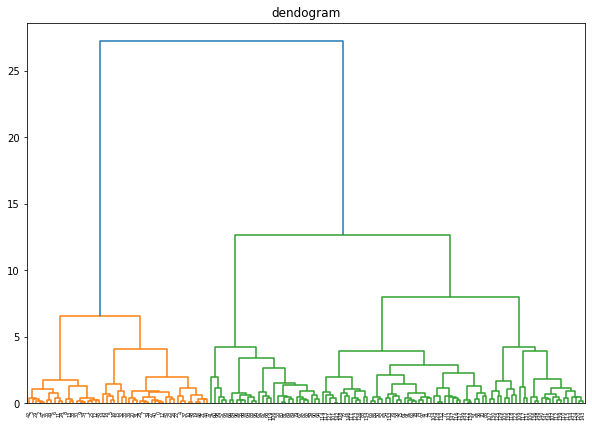

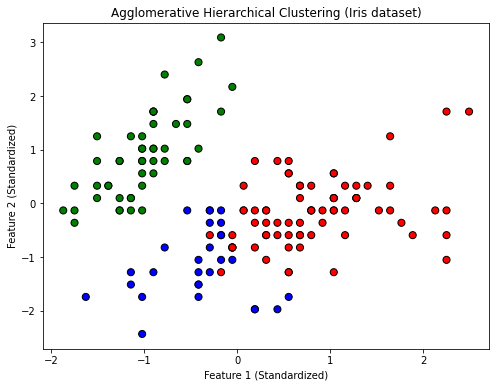

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('dendogram')
dend=shc.dendrogram(shc.linkage(X_scaled,method='ward'))

# Apply Agglomerative Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=3)
cluster_labels = cluster.fit_predict(X_scaled)

# Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
colors = np.array(['r', 'g', 'b'])

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors[cluster_labels], edgecolors='k', s=50)
plt.title('Agglomerative Hierarchical Clustering (Iris dataset)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Question 15 Write a program to implement 2-layered ANN for classifying digits datasets from sklearn. Use 70% data for training the model and check the accuracy of the model on remaining 30% data. Use softmax activation function in the last layer and relu function in the hidden layer

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_digits
digits_dataset = load_digits()
print('Keys of Digit dataset {}'.format(digits_dataset.keys()))
data = digits_dataset.data
target = digits_dataset.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.30,random_state = 0)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
y_pred = model.evaluate(x_test, y_test)
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
predictions